# **Actividad 8: Uso de software para búsqueda**
### Marco Antonio Mejia Garcia
###1950271
###008 N4 LMV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
# Cargar los datos de MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Normalizar los datos
train_data = train_data / 255.0
test_data = test_data / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Definir el modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Entrenar el modelo con el conjunto de datos de entrenamiento
model.fit(train_data, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9937 - loss: 0.0176
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9960 - loss: 0.0112
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9955 - loss: 0.0127
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9965 - loss: 0.0106
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9967 - loss: 0.0101
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9967 - loss: 0.0090
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9972 - loss: 0.0081
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9962 - loss: 0.0103
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9976 - loss: 0.0079
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9968 - loss: 0.0106


In [8]:
# Evaluar el modelo con el conjunto de datos de prueba
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Exactitud en el conjunto de prueba: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.1444
Exactitud en el conjunto de prueba: 0.98


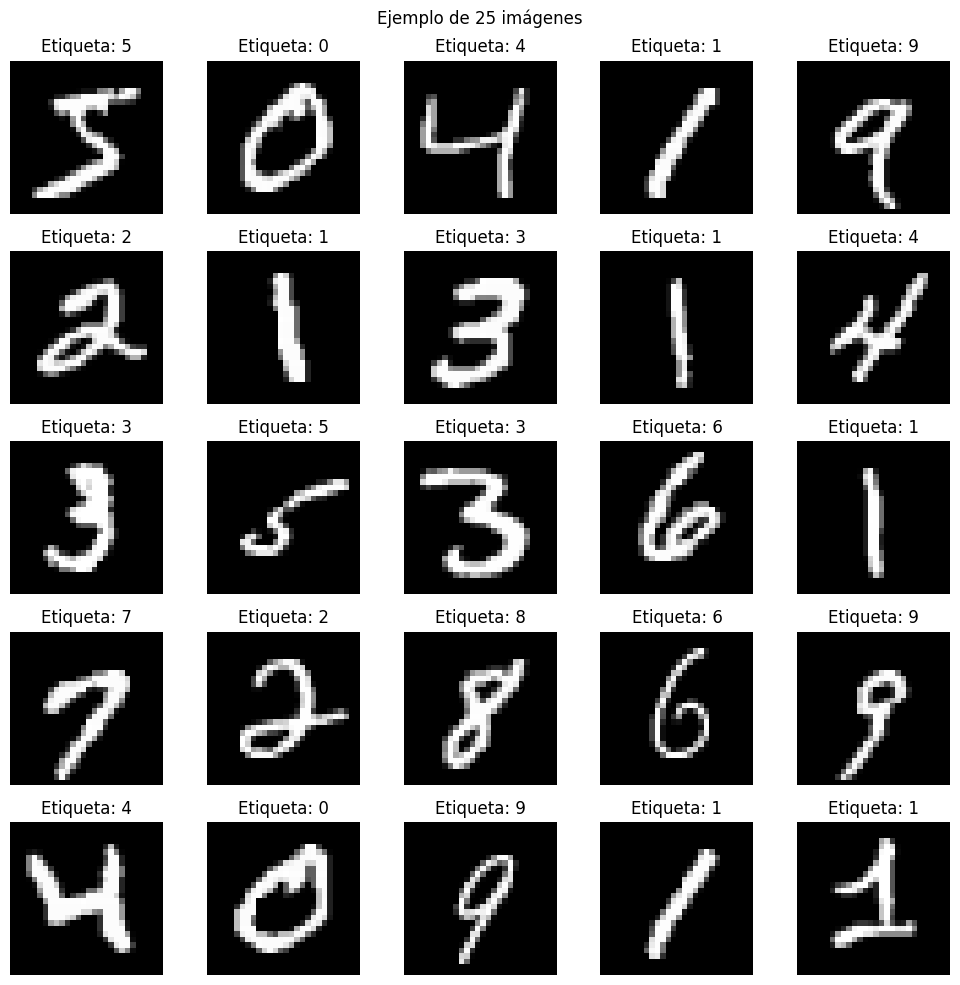

In [9]:
#25 imágenes como ejemplo
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_data[i], cmap='gray')
    plt.title(f"Etiqueta: {train_labels[i]}")
    plt.axis('off')
plt.suptitle("Ejemplo de 25 imágenes")
plt.tight_layout()
plt.show()

In [10]:
#  200 imágenes aleatorias combinadas de entrenamiento y prueba
all_data = np.concatenate((train_data, test_data), axis=0)
all_labels = np.concatenate((train_labels, test_labels), axis=0)
random_indices = np.random.choice(len(all_data), 200, replace=False)
random_images = all_data[random_indices]
random_labels = all_labels[random_indices]

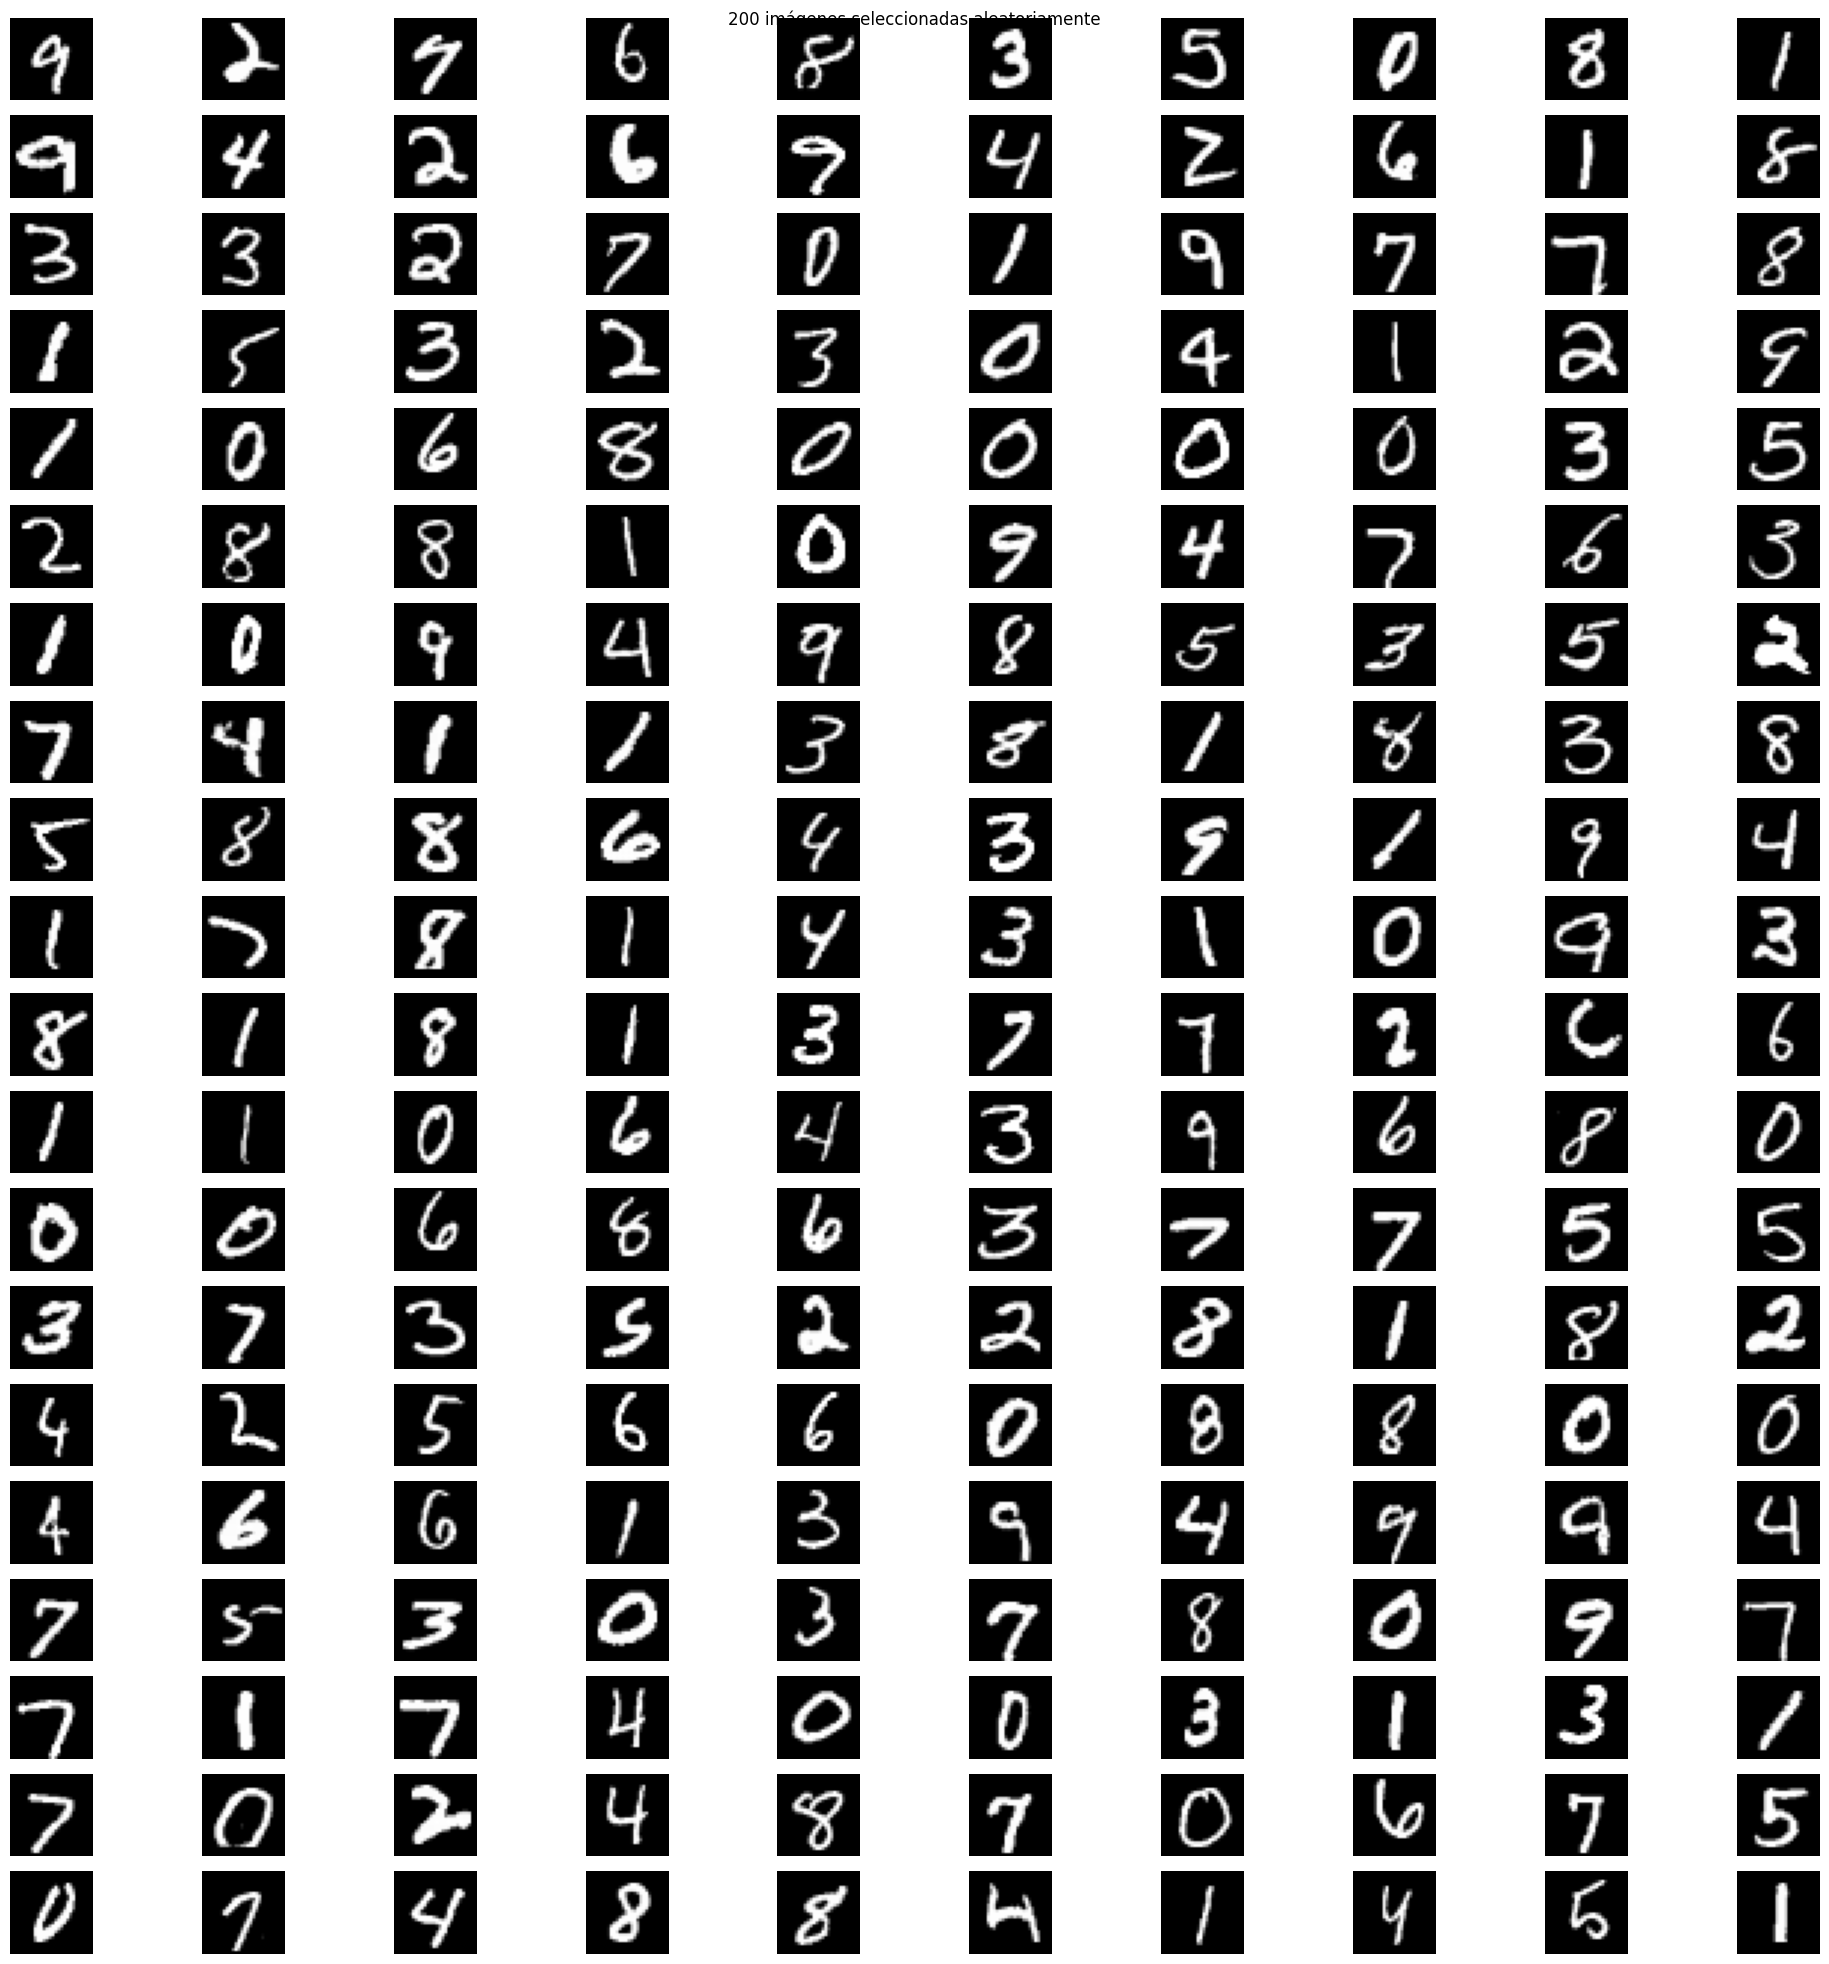

In [11]:
# Parte de imagenes
plt.figure(figsize=(20, 20))
for i in range(200):
    plt.subplot(20, 10, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.axis('off')
plt.suptitle("200 imágenes seleccionadas aleatoriamente")
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


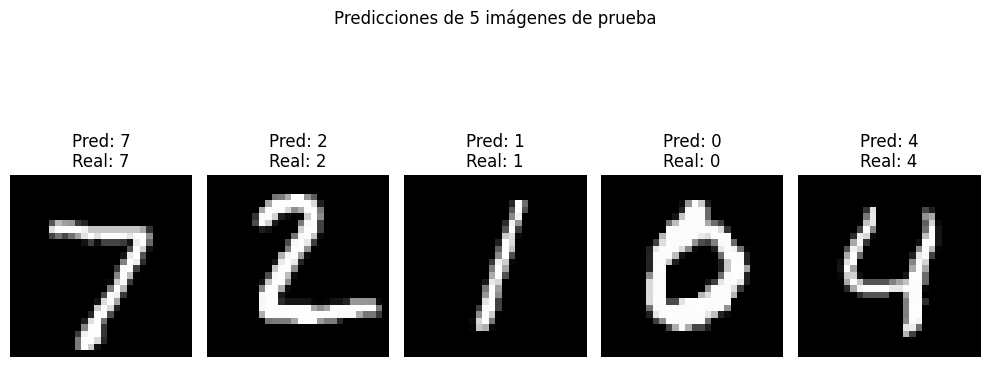

In [12]:
# Realizar 5 predicciones en el conjunto de prueba y mostrar los resultados
predictions = model.predict(test_data[:5])

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_data[i], cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    plt.title(f"Pred: {pred_label}\nReal: {true_label}")
    plt.axis('off')
plt.suptitle("Predicciones de 5 imágenes de prueba")
plt.tight_layout()
plt.show()